<a href="https://colab.research.google.com/github/Mario-RJunior/olist-e-commerce/blob/master/reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Reviews

## 1) Introdução
Uma importante abordagem ao trabalhar com análise de dados de uma base comercial é justamente o feedback dos consumidores no que diz respeito à qualidade dos produtos, ao atendimento, etc. e a neste sentido é de suma importância ter uma base de dados que tenham essas informações, uma vez que elas ajudam a melhorar a qualidade do serviço.

Aqui não é diferente e neste notebook trabalharemos com uma base contendo, entre outros, os reviews dos clientes acerca dos produtos e uma nota atribuida a ele. Assim, utilizaremos alguns algorítmos de Processamento de Linguagem Natural (em inglês NPL) para fazer um classificador de sentimento, ou seja, determinar se um determinado review é positivo ou negativo.

Portanto, a partir da próxima seção iremos dar início a esta etapa do estudo.

## 2) Carregando e explorando os dados

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando a base de dados
link = 'https://raw.githubusercontent.com/Mario-RJunior/olist-e-commerce/master/datasets/olist_order_reviews_dataset.csv'
reviews = pd.read_csv(link)

In [3]:
# Visualizando o cabeçalho
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
# Verificando o shape do dataframe
reviews.shape

(100000, 7)

In [5]:
# Retornando informações sobre o dataframe
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [6]:
# Retornando algumas estatísticas
reviews.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
# Verificando valores faltantes
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

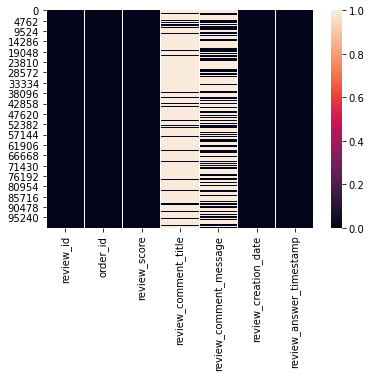

In [8]:
# Visualizando valores faltantes com heatmap
sns.heatmap(data=reviews.isnull());

Confirmamos que há uma grande quantidade de valores faltantes.

In [9]:
# Visualizando alguns comentários
reviews['review_comment_message']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                    Recebi bem antes do prazo estipulado.
4        Parabéns lojas lannister adorei comprar pela I...
                               ...                        
99995                                                  NaN
99996    Excelente mochila, entrega super rápida. Super...
99997                                                  NaN
99998    Solicitei a compra de uma capa de retrovisor c...
99999    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 100000, dtype: object

In [10]:
# Visualizando alguns títulos dos comentários
reviews['review_comment_title'].unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [11]:
# Número de títulos não únicos
reviews['review_comment_title'].nunique()

4600

In [12]:
# Contagem dos scores
reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

Podemos ainda fazer um histograma para verificar a ocorrência dos scores.

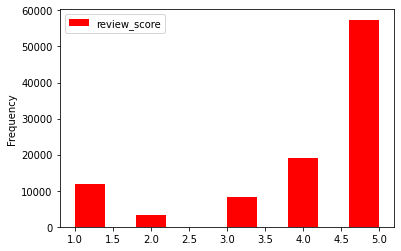

In [20]:
# # Plotando histograma
reviews.plot(kind='hist', color='r');

### Adicionando coluna para classificação

No dataframe reviews temos a coluna "review_score" que representa as notas (de 1 a 5) para os serviços oferecidos. Neste caso, como queremos criar um classificador binário para os comentários (positivos e negativos) devemos então gerar esta classificação baseado no score dado para cada comentário. Assim, tomaremos o seguinte critério:

- scores 1, 2 e 3: comentário negativo = 0;
- scores 4 e 5: comentário positivo = 1.

Desta forma, adicionaremos a coluna "feedback" com a respectiva classificação para cada comentário.

In [24]:
# Adicionando a coluna "feedback"
reviews['feedback'] = reviews['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [25]:
# Verificando o dataframe com a nova coluna
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,feedback
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
...,...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,1
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,1
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,0


Agora precisamos eliminar as colunas do dataframe que não serão utilizadas. Logo, deixaremos apenas as colunas "review_comment_message" e "feedback".

In [26]:
# Deletando colunas desnecessárias
reviews = reviews.drop(columns=['review_id', 'order_id', 'review_score', 
                                'review_comment_title', 'review_creation_date',	
                                'review_answer_timestamp'], axis=1)

# Visualizando o cabeçalho
reviews.head()

,review_comment_message,feedback
0,NaN,1
1,NaN,1
2,NaN,1
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,1


In [28]:
# Deletando registros com valores faltantes
reviews.dropna(inplace=True)

In [29]:
# Visualizando o cabeçalho
reviews.head()

,review_comment_message,feedback
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,1
9,aparelho eficiente. no site a marca do aparelh...,1
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
15,"Vendedor confiável, produto ok e entrega antes...",1


In [30]:
# Visualizando o novo shape do dataframe
reviews.shape

(41753, 2)